## Importing Libraries

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
from sklearn.metrics import matthews_corrcoef

### Loading the dataset

In [70]:
data = pd.read_csv('sample_data_intw.csv',parse_dates = ['pdate'])

In [71]:
data.shape

(209593, 37)

In [72]:
data.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

In [73]:
# All the data set has only one circle. So drooping the feature
data['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [74]:
data = data.drop('pcircle',axis=1)

In [75]:
data['pdate'] = pd.to_datetime(data['pdate'])

In [76]:
print(data['pdate'].dt.year.value_counts(),data['pdate'].dt.month.value_counts(),data['pdate'].dt.day.value_counts())

2016    209593
Name: pdate, dtype: int64 7    85765
6    83154
8    40674
Name: pdate, dtype: int64 11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: pdate, dtype: int64


In [77]:
data['month'] = data['pdate'].dt.month
data['day'] = data['pdate'].dt.day

In [10]:
data = data.drop('pdate',axis=1)

In [11]:
# Percentage of label in dataset
print("0 :",100*sum(data['label']==0)/len(data['label']))
print("1 :",100*sum(data['label']==1)/len(data['label']))

0 : 12.482287099282896
1 : 87.5177129007171


In [12]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [13]:
data = data.set_index('Unnamed: 0')

In [14]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [15]:
# Checking the null values
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
month                   0
day                     0
dtype: int64

In [78]:
X_train, X_test = train_test_split(data,test_size=0.33)

In [19]:
X_train.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
69790,69791,1,80928I90847,531.0,5628.029667,5691.990000,644.39,720.39,5.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-07-19
142507,142508,1,43056I95204,179.0,4403.863000,4415.070000,2048.24,2242.46,2.0,0.0,...,12.0,1.0,3.0,24,12,1.0,13.666667,13.666667,UPW,2016-07-03
73120,73121,1,00320I84453,-26.0,17.886333,17.886333,828.92,828.92,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-23
161895,161896,1,57139I85350,356.0,102.460000,102.460000,920.00,920.00,7.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-20
45595,45596,1,34976I90843,839.0,19191.000000,35422.860000,2794.50,7410.98,1.0,0.0,...,12.0,0.0,9.0,84,12,0.0,2.000000,2.300000,UPW,2016-08-09


In [20]:
X_train.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,...,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000,140427.000000
mean,104746.757077,0.875259,8120.347185,5377.775455,6081.170538,2683.296469,3471.213219,3792.666990,3595.795227,2062.866999,...,2.763877,17.976116,282.099024,0.054548,18.127997,23.689675,6.701745,0.046426,3.397436,4.307536
std,60549.383359,0.330426,75848.161035,9175.166730,10874.712129,4292.928046,5730.236650,54175.691712,52264.856179,2348.917506,...,2.560541,17.390731,4297.809138,0.219498,220.621946,26.511206,2.098101,0.201861,8.841079,10.275794
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52102.500000,1.000000,246.000000,42.760667,42.985833,280.030000,300.445000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104794.000000,1.000000,529.000000,1479.000000,1500.400000,1081.920000,1335.340000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157189.500000,1.000000,984.000000,7254.963333,7812.295000,3346.480000,4190.035000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209592.000000,1.000000,999520.609388,212364.000000,244906.760000,198926.110000,200148.110000,997717.809631,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,426.000000,12.000000,3.000000,171.500000,171.500000


In [21]:
# Percentage of label in training dataset
print("0 :",100*sum(X_train['label']==0)/len(X_train['label']))
print("1 :",100*sum(X_train['label']==1)/len(X_train['label']))

0 : 12.474096861714628
1 : 87.52590313828537


## Checking if the data in the columns are in correct format

In [22]:
import re
X_train['msisdn']=X_train['msisdn'].apply(lambda x: re.sub('I',"",x))

C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
X_test['msisdn'] = X_test['msisdn'].apply(lambda x: re.sub('I',"",x))

C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
X_train.loc[:,'msisdn'] = X_train['msisdn'].astype("int64")
X_test.loc[:,'msisdn'] = X_test['msisdn'].astype("int64")

C:\Users\NITIN\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


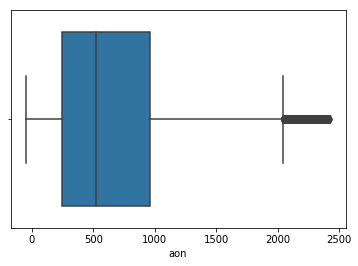

In [29]:
sns.boxplot(X_train['aon'])

In [26]:
# Percentage of invalid number age on celluar network
(100*len(X_train['aon'][X_train['aon']>40000]))/len(X_train['aon'])

0.993398705377171

In [64]:
def aon(value):
    if value >=100:
        value = 1
    else:
        value=0
    return value

In [83]:
X_train['aon_cat'] = X_train['aon'].apply(aon)

C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
X_train['aon_cat'].value_counts()

1    133208
0      7219
Name: aon_cat, dtype: int64

In [27]:
#It is less than one percent so dropping that rows
def drop_outliers(dataFrame,column,value):
    dataFrame = dataFrame.drop(dataFrame[(dataFrame[column]>value)].index).reset_index(drop=True)
    return dataFrame

In [28]:
X_train = drop_outliers(X_train,'aon',40000)

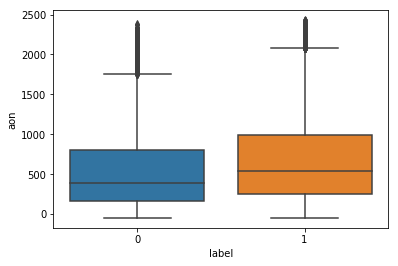

In [31]:
sns.boxplot(y=X_train['aon'],x=X_train['label'])

In [91]:
X_train[['aon_cat','daily_decr30']].groupby('aon_cat').aggregate(lambda x : x.quantile(0.25))

,daily_decr30
aon_cat,
0,6.9500
1,48.4665


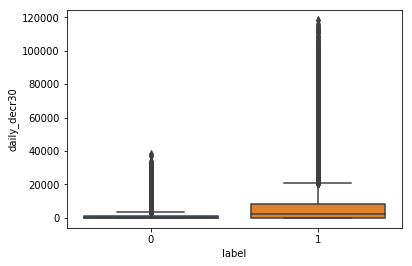

In [46]:
sns.boxplot(y=X_train['daily_decr30'],x=X_train['label'])

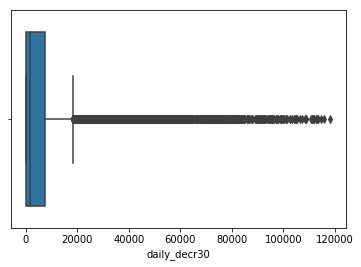

In [52]:
sns.boxplot(X_train['daily_decr30'])

In [48]:
len(X_train['daily_decr30'][X_train['daily_decr30']>100000])

28

In [49]:
X_train.shape

(137755, 37)

In [51]:
X_train = X_train.drop(X_train[(X_train['daily_decr30']>120000) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [50]:
X_train = X_train.drop(X_train[(X_train['daily_decr30']>100000) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [37]:
# Dropping the negative spend values from daily_decr30 feature
def remove_negative_values(dataFrame,column):
    dataFrame = dataFrame.drop(dataFrame[(dataFrame[column]<0)].index).reset_index(drop=True)
    return dataFrame

In [38]:
X_train = remove_negative_values(X_train,'daily_decr30')

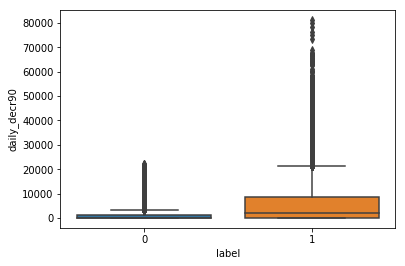

In [35]:
sns.boxplot(y=X_train['daily_decr90'],x=X_train['label'])

In [36]:
X_train = X_train.drop(X_train[(X_train['daily_decr90']>50000) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

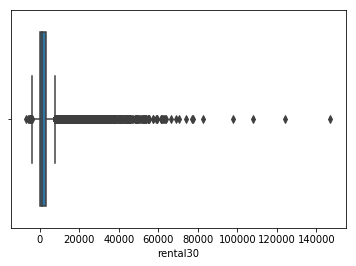

In [37]:
sns.boxplot(X_train['rental30'])

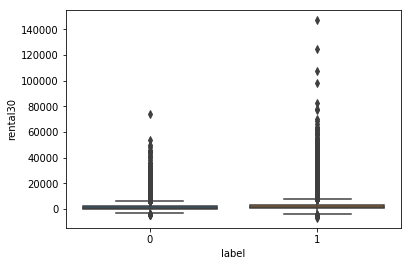

In [38]:
sns.boxplot(y=X_train['rental30'],x=X_train['label'])

In [39]:
len(X_train[X_train['rental30']<0])

3777

In [40]:
X_train = remove_negative_values(X_train,'rental30')

In [41]:
X_train = X_train.drop(X_train[(X_train['rental30']>28000) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [42]:
X_train = X_train.drop(X_train[(X_train['rental30']>28000) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [43]:
len(X_train[X_train['rental90']<0])

210

In [44]:
X_train = remove_negative_values(X_train,'rental90')

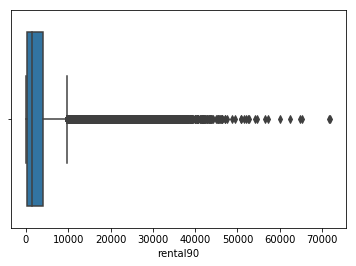

In [45]:
sns.boxplot(X_train['rental90'])

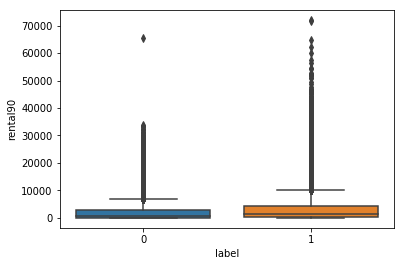

In [46]:
sns.boxplot(y=X_train['rental90'],x=X_train['label'])

In [47]:
X_train = drop_outliers(X_train,'rental90',35000)

In [48]:
X_train = X_train.drop(X_train[(X_train['rental90']>27000) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [49]:
len(X_train[X_train['last_rech_date_ma']<0])

811

In [50]:
# Dropping the negative values becuase negative days are not possible
X_train = remove_negative_values(X_train,'last_rech_date_ma')

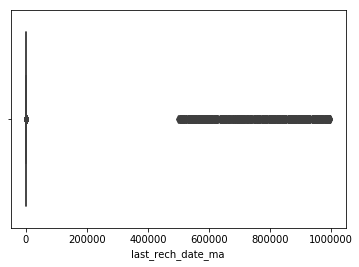

In [51]:
sns.boxplot(X_train['last_rech_date_ma'])

In [52]:
X_train = drop_outliers(X_train,'last_rech_date_ma',15)

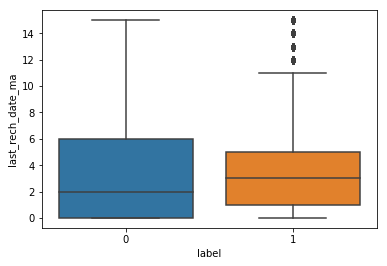

In [53]:
sns.boxplot(y=X_train['last_rech_date_ma'],x=X_train['label'])

In [54]:
X_train = X_train.drop(X_train[(X_train['last_rech_date_ma']>11) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [55]:
X_train[X_train['last_rech_date_da']<0]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
10820,1,6937589238,821.0,0.000000,0.000000,1807.89,1807.89,0.0,-12.0,0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,6,21
13108,1,6522590844,821.0,763.445000,771.150000,2608.84,2698.80,4.0,-2.0,7526,...,6.0,0.0,4.0,24,6,0.0,1.333333,1.333333,7,1
15835,1,8346090585,1361.0,166.750333,166.750333,2015.33,2015.33,1.0,-14.0,8000,...,6.0,0.0,4.0,24,6,0.0,1.750000,1.750000,6,19
69219,1,245688698,108.0,21.590000,21.590000,192.84,192.84,7.0,-27.0,1547,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,6,6
97275,1,5690088659,168.0,83.695333,83.695333,487.74,487.74,1.0,-11.0,1539,...,6.0,0.0,3.0,18,6,0.0,1.666667,1.666667,6,22
103343,1,4888388698,513.0,20.157000,20.157000,53.37,53.37,10.0,-24.0,1547,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,6,9


In [56]:
# Dropping the negative values becuase negative days are not possible
X_train = remove_negative_values(X_train,'last_rech_date_da')

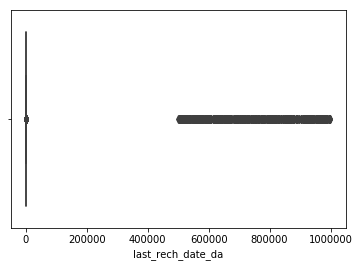

In [57]:
sns.boxplot(X_train['last_rech_date_da'])

In [58]:
len(X_train['last_rech_date_da'][X_train['last_rech_date_da']==0])/(0.01*len(X_train['last_rech_date_da']))

96.95503953451015

In [59]:
X_train = drop_outliers(X_train,'last_rech_date_da',40000)

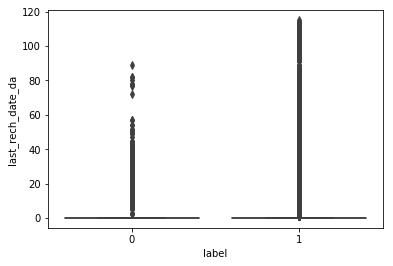

In [60]:
sns.boxplot(y=X_train['last_rech_date_da'],
            x=X_train['label'])

In [61]:
X_train = X_train.drop(X_train[(X_train['last_rech_date_da']>55) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

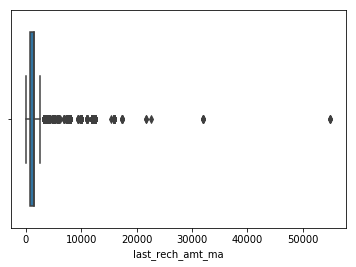

In [62]:
sns.boxplot(X_train['last_rech_amt_ma'])

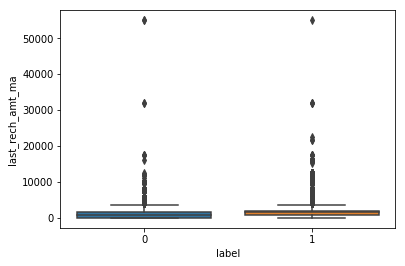

In [63]:
sns.boxplot(y=X_train['last_rech_amt_ma'],x=X_train['label'])

In [64]:
X_train = drop_outliers(X_train,'last_rech_amt_ma',3000)

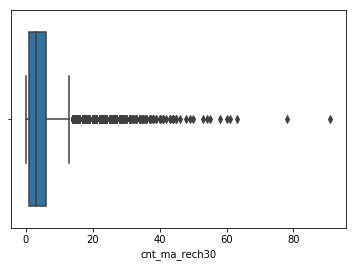

In [65]:
sns.boxplot(X_train['cnt_ma_rech30'])

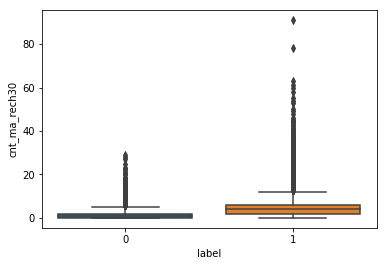

In [66]:
sns.boxplot(y=X_train['cnt_ma_rech30'],x=X_train['label'])

In [67]:
X_train = X_train.drop(X_train[(X_train['cnt_ma_rech30']>12) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [68]:
X_train = X_train.drop(X_train[(X_train['cnt_ma_rech30']>5) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

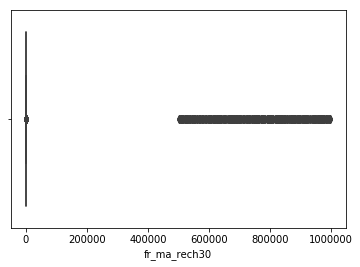

In [69]:
sns.boxplot(X_train['fr_ma_rech30'])

In [70]:
X_train = drop_outliers(X_train,'fr_ma_rech30',12.5)

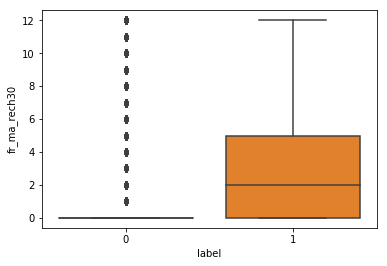

In [71]:
sns.boxplot(y=X_train['fr_ma_rech30'],x=X_train['label'])

In [72]:
X_train = X_train.drop(X_train[(X_train['fr_ma_rech30']>0) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [73]:
X_train[X_train['sumamnt_ma_rech30']<0]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day


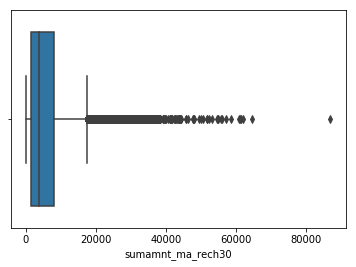

In [74]:
sns.boxplot(X_train['sumamnt_ma_rech30'])

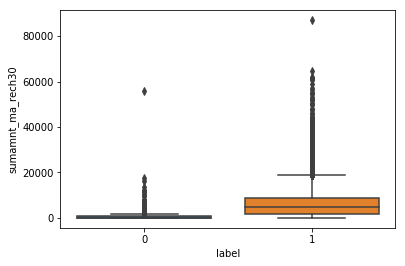

In [75]:
sns.boxplot(y=X_train['sumamnt_ma_rech30'],x=X_train['label'])

In [76]:
X_train = X_train.drop(X_train[(X_train['sumamnt_ma_rech30']>8600) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [77]:
X_train = X_train.drop(X_train[(X_train['sumamnt_ma_rech30']>35000) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

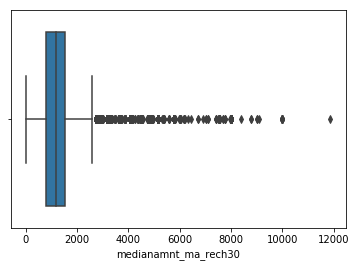

In [78]:
sns.boxplot(X_train['medianamnt_ma_rech30'])

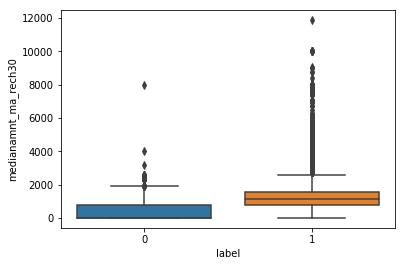

In [79]:
sns.boxplot(y=X_train['medianamnt_ma_rech30'],x=X_train['label'])

In [80]:
X_train = X_train.drop(X_train[(X_train['medianamnt_ma_rech30']>2000) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [81]:
X_train = X_train.drop(X_train[(X_train['medianamnt_ma_rech30']>2740) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [82]:
len(X_train[X_train['medianmarechprebal30']<0])

641

In [83]:
X_train = remove_negative_values(X_train,'medianmarechprebal30')

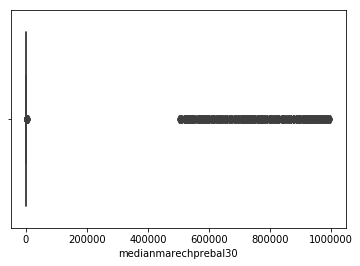

In [84]:
sns.boxplot(X_train['medianmarechprebal30'])

In [85]:
X_train = drop_outliers(X_train,'medianmarechprebal30',1000)

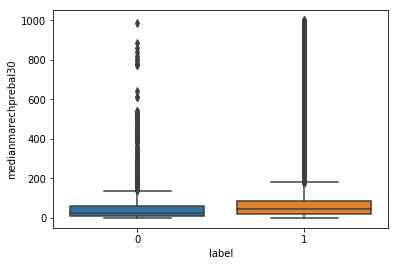

In [86]:
sns.boxplot(y=X_train['medianmarechprebal30'][X_train['medianmarechprebal30']>0],
            x=X_train['label'][X_train['medianmarechprebal30']>0])

In [87]:
X_train = X_train.drop(X_train[(X_train['medianmarechprebal30']>570) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [88]:
(100*len(X_train[X_train['medianmarechprebal30']>1000]))/len(X_train['medianmarechprebal30'])

0.0

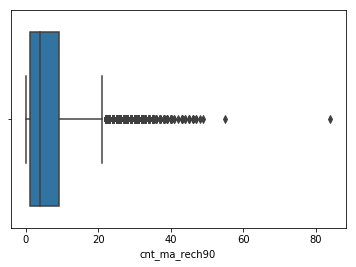

In [89]:
sns.boxplot(X_train['cnt_ma_rech90'])

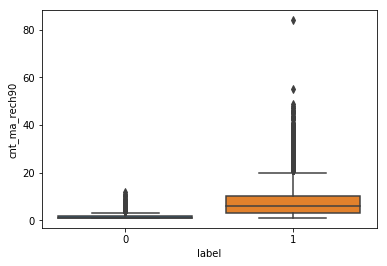

In [90]:
sns.boxplot(y=X_train['cnt_ma_rech90'][X_train['cnt_ma_rech90']>0],
            x=X_train['label'][X_train['cnt_ma_rech90']>0])

In [91]:
X_train = drop_outliers(X_train,'cnt_ma_rech90',45)

In [92]:
X_train[X_train['fr_ma_rech90']<0]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day


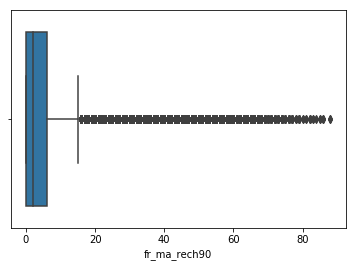

In [93]:
sns.boxplot(X_train['fr_ma_rech90'])

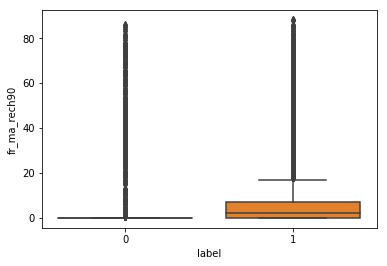

In [94]:
sns.boxplot(y=X_train['fr_ma_rech90'],x=X_train['label'])

In [95]:
len(X_train[X_train['fr_ma_rech90']>15])/len(X_train['fr_ma_rech90'])

0.11771581449109729

In [96]:
X_train = drop_outliers(X_train,'fr_ma_rech90',45)

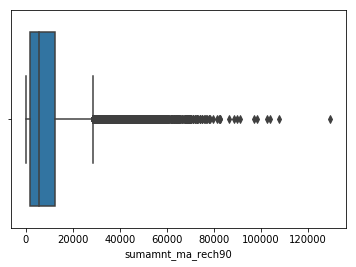

In [97]:
sns.boxplot(X_train['sumamnt_ma_rech90'])

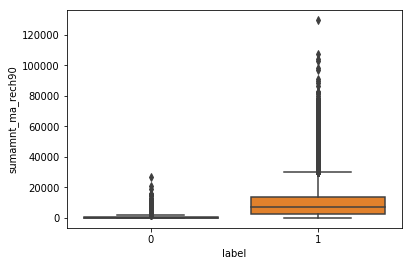

In [98]:
sns.boxplot(y=X_train['sumamnt_ma_rech90'],x=X_train['label'])

In [99]:
X_train = X_train.drop(X_train[(X_train['sumamnt_ma_rech90']>15000) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [100]:
X_train = X_train.drop(X_train[(X_train['sumamnt_ma_rech90']>80000) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

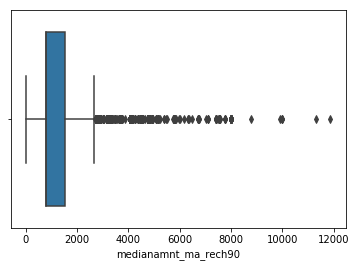

In [101]:
sns.boxplot(X_train['medianamnt_ma_rech90'])

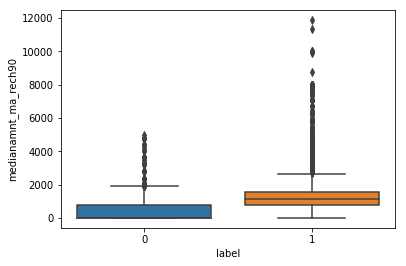

In [102]:
sns.boxplot(y=X_train['medianamnt_ma_rech90'],x=X_train['label'])

In [103]:
X_train = drop_outliers(X_train,'medianamnt_ma_rech90',3800)

In [104]:
X_train = X_train.drop(X_train[(X_train['medianamnt_ma_rech90']>2300) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [105]:
len(X_train[X_train['medianmarechprebal90']<0])

33

In [106]:
X_train = remove_negative_values(X_train,'medianmarechprebal90')

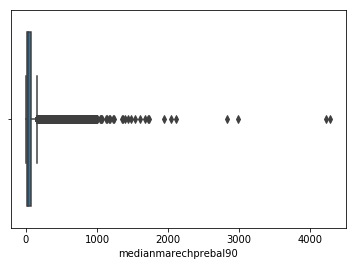

In [107]:
sns.boxplot(X_train['medianmarechprebal90'])

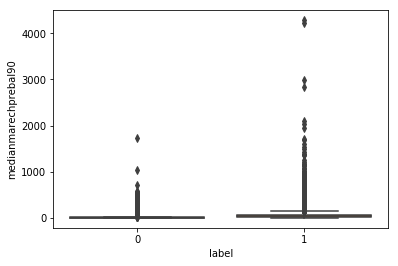

In [108]:
sns.boxplot(y=X_train['medianmarechprebal90'],x=X_train['label'])

In [109]:
X_train = X_train.drop(X_train[(X_train['medianmarechprebal90']>=700) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [110]:
X_train = X_train.drop(X_train[(X_train['medianmarechprebal90']>1000) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

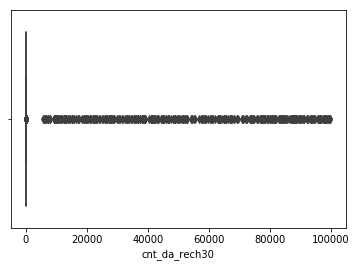

In [111]:
sns.boxplot(X_train['cnt_da_rech30'])

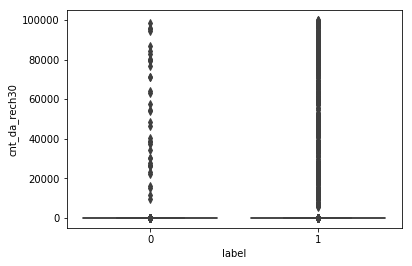

In [112]:
sns.boxplot(y=X_train['cnt_da_rech30'],x=X_train['label'])

In [113]:
len(X_train['cnt_da_rech30'][X_train['cnt_da_rech30']==0])/(0.01*len(X_train['cnt_da_rech30']))

98.23691019177936

In [114]:
# Dropping that feature almost 98.2 % values are same
X_train = X_train.drop('cnt_da_rech30',axis=1)
X_test = X_test.drop('cnt_da_rech30',axis=1)

In [115]:
len(X_train['fr_da_rech30'][X_train['fr_da_rech30']==0])/(0.01*len(X_train['fr_da_rech30']))

99.29583099943986

In [116]:
# Dropping that feature almost 99.2 % values are same
X_train = X_train.drop('fr_da_rech30',axis=1)
X_test = X_test.drop('fr_da_rech30',axis=1)

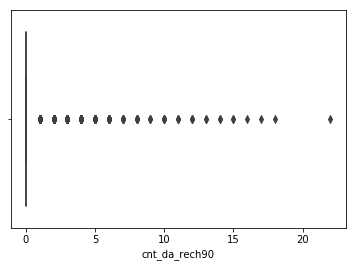

In [117]:
sns.boxplot(X_train['cnt_da_rech90'])

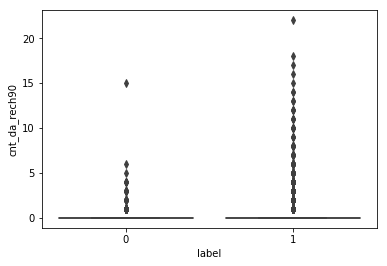

In [118]:
sns.boxplot(y=X_train['cnt_da_rech90'],x=X_train['label'])

In [119]:
len(X_train['cnt_da_rech90'][X_train['cnt_da_rech90']==0])/(0.01*len(X_train['cnt_da_rech90']))

97.84214878237442

In [120]:
# Dropping that feature almost 97.8 % values are same
X_train = X_train.drop('cnt_da_rech90',axis=1)
X_test = X_test.drop('cnt_da_rech90',axis=1)

In [121]:
len(X_train['fr_da_rech90'][X_train['fr_da_rech90']==0])/(0.01*len(X_train['fr_da_rech90']))

99.66925395428235

In [122]:
# Dropping that feature almost 97.8 % values are same
X_train = X_train.drop('fr_da_rech90',axis=1)
X_test = X_test.drop('fr_da_rech90',axis=1)

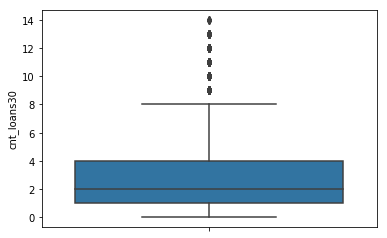

In [123]:
sns.boxplot(y=X_train['cnt_loans30'])

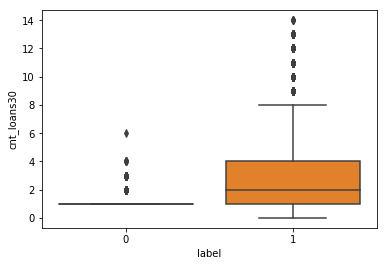

In [124]:
sns.boxplot(y=X_train['cnt_loans30'],x=X_train['label'])

In [125]:
X_train = X_train.drop(X_train[(X_train['cnt_loans30']>8.5) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [126]:
X_train = X_train.drop(X_train[(X_train['cnt_loans30']>=2) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

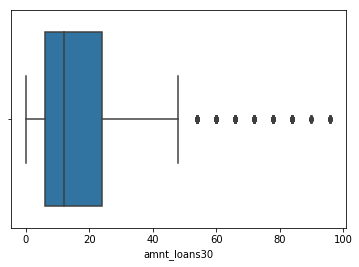

In [127]:
sns.boxplot(X_train['amnt_loans30'])

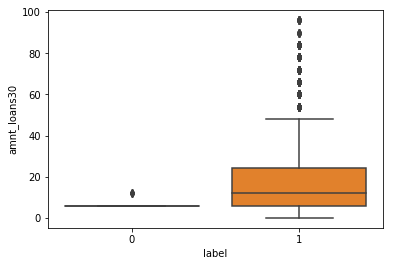

In [128]:
sns.boxplot(y=X_train['amnt_loans30'],x=X_train['label'])

In [129]:
X_train = X_train.drop(X_train[(X_train['amnt_loans30']>10) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [130]:
X_train = X_train.drop(X_train[(X_train['amnt_loans30']>50) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [131]:
X_train = drop_outliers(X_train,'maxamnt_loans30',30)

In [132]:
X_train['maxamnt_loans30'].value_counts()

6.0     64627
12.0     5999
0.0       789
Name: maxamnt_loans30, dtype: int64

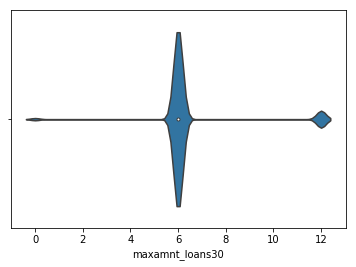

In [133]:
sns.violinplot(X_train['maxamnt_loans30'])

In [134]:
dict_value = {6:1,12:1}
X_train['loan_0'] = X_train['maxamnt_loans30'].replace(dict_value)
X_test['loan_0'] = X_test['maxamnt_loans30'].replace(dict_value)

In [135]:
X_train['loan_0'].value_counts()

1.0    70626
0.0      789
Name: loan_0, dtype: int64

In [136]:
X_train['medianamnt_loans30'].value_counts()

0.0    66869
1.0     2368
0.5     2005
2.0      157
1.5       13
3.0        3
Name: medianamnt_loans30, dtype: int64

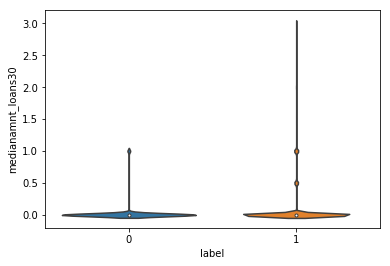

In [137]:
sns.violinplot(y=X_train['medianamnt_loans30'],
            x=X_train['label'])

In [138]:
X_train = drop_outliers(X_train,'medianamnt_loans30',1.4)

In [139]:
X_train = X_train.drop('medianamnt_loans30',axis=1)
X_test = X_test.drop('medianamnt_loans30',axis=1)

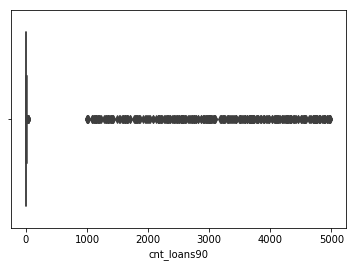

In [140]:
sns.boxplot(X_train['cnt_loans90'])

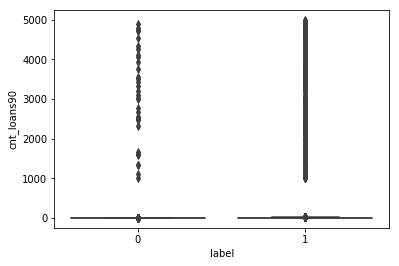

In [141]:
sns.boxplot(y=X_train['cnt_loans90'],
            x=X_train['label'])

In [142]:
X_train = drop_outliers(X_train,'cnt_loans90',12)

In [143]:
X_train = X_train.drop(X_train[(X_train['cnt_loans90']>=12) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [144]:
X_train = X_train.drop(X_train[(X_train['cnt_loans90']>=2) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [145]:
X_train['cnt_loans90'].value_counts()

1.0     26418
2.0     11061
3.0      7975
4.0      5999
5.0      4773
6.0      3848
7.0      2984
8.0      2194
9.0      1405
10.0      983
11.0      729
0.0       516
Name: cnt_loans90, dtype: int64

In [146]:
len(X_train['cnt_loans90'][X_train['cnt_loans90']>12])/len(X_train['cnt_loans90'])

0.0

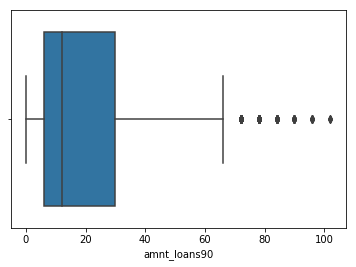

In [147]:
sns.boxplot(X_train['amnt_loans90'])

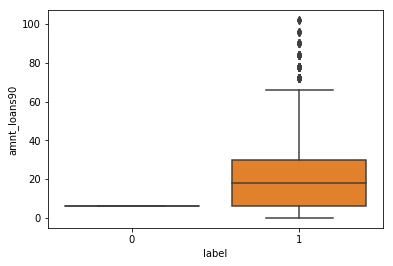

In [148]:
sns.boxplot(y=X_train['amnt_loans90'],x=X_train['label'])

In [149]:
X_train = X_train.drop(X_train[(X_train['amnt_loans90']>70) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

In [150]:
X_train['maxamnt_loans90'].value_counts()

6     62666
12     5431
0       516
Name: maxamnt_loans90, dtype: int64

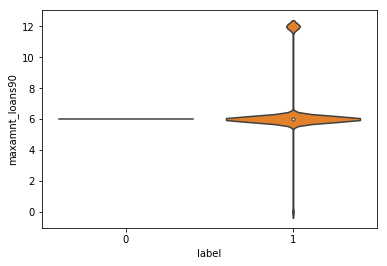

In [151]:
sns.violinplot(y=X_train['maxamnt_loans90'],x=X_train['label'])

In [152]:
X_train['medianamnt_loans90'].value_counts()

0.0    64833
1.0     2072
0.5     1708
Name: medianamnt_loans90, dtype: int64

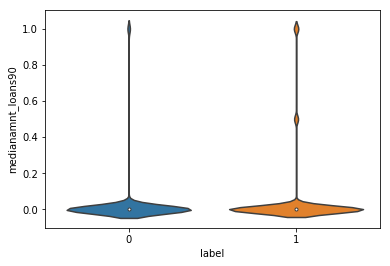

In [153]:
sns.violinplot(y=X_train['medianamnt_loans90'],x=X_train['label'])

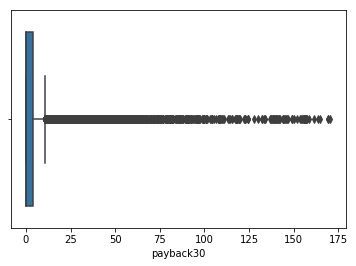

In [154]:
sns.boxplot(X_train['payback30'])

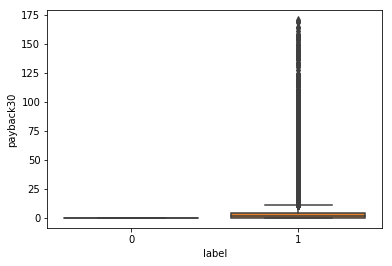

In [155]:
sns.boxplot(y=X_train['payback30'],x=X_train['label'])

In [156]:
X_train = X_train.drop(X_train[(X_train['payback30']>30) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [157]:
X_train = X_train.drop(X_train[(X_train['payback30']>30) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

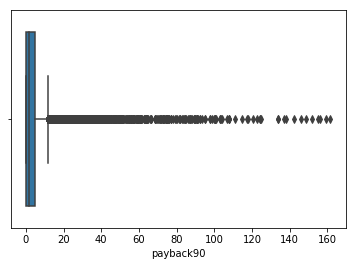

In [158]:
sns.boxplot(X_train['payback90'])

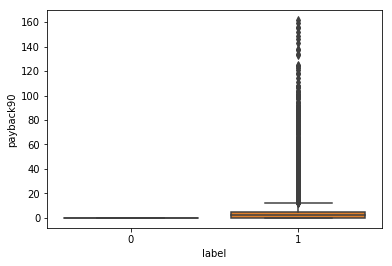

In [159]:
sns.boxplot(y=X_train['payback90'],x=X_train['label'])

In [160]:
len(X_train[X_train['payback90']>30])/(0.01*len(X_train['payback90']))

0.7099646496768182

In [161]:
X_train = X_train.drop(X_train[(X_train['payback90']>30) 
                         & (X_train['label']==0)].index).reset_index(drop=True)

In [162]:
X_train = X_train.drop(X_train[(X_train['payback90']>30) 
                         & (X_train['label']==1)].index).reset_index(drop=True)

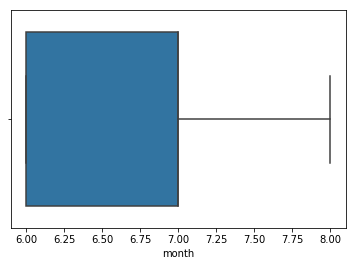

In [163]:
sns.boxplot(X_train['month'])

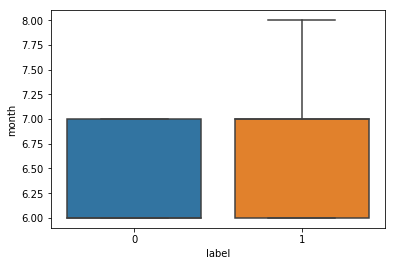

In [164]:
sns.boxplot(y=X_train['month'],x=X_train['label'])

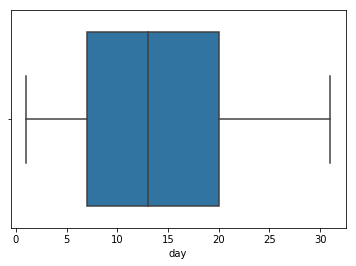

In [165]:
sns.boxplot(X_train['day'])

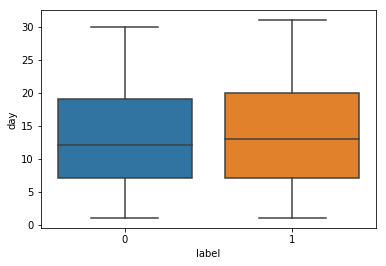

In [166]:
sns.boxplot(y=X_train['day'],x=X_train['label'])

In [167]:
# Seperating continuous and categorical features for find correlation between them
category_features = ['maxamnt_loans30','maxamnt_loans90']
continuous_features = ['msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
        'medianamnt_loans90', 'payback30', 'payback90',
       'month', 'day']

## Finding relation between continuous features

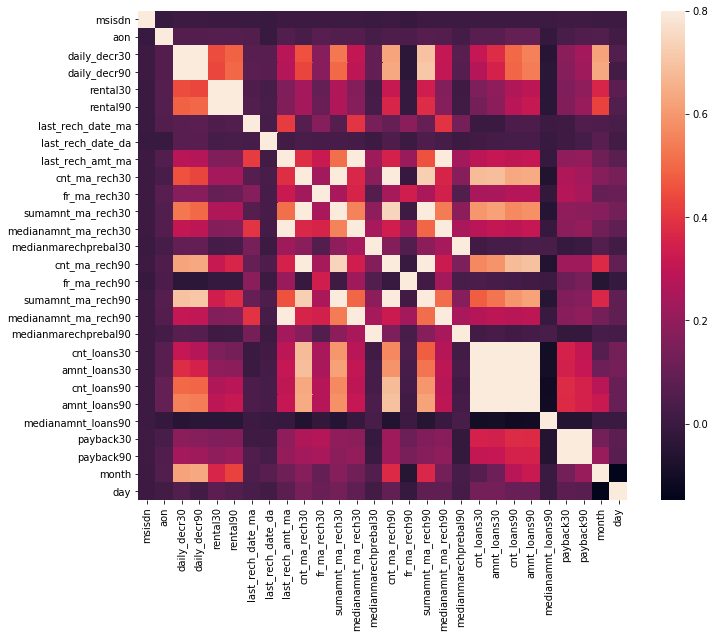

In [168]:
corrmat = X_train[continuous_features].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

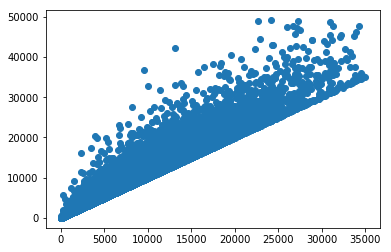

In [169]:
plt.scatter(X_train['daily_decr30'],X_train['daily_decr90'])

In [170]:
X_train[['daily_decr30','daily_decr90']].corr()

,daily_decr30,daily_decr90
daily_decr30,1.00000,0.97726
daily_decr90,0.97726,1.00000


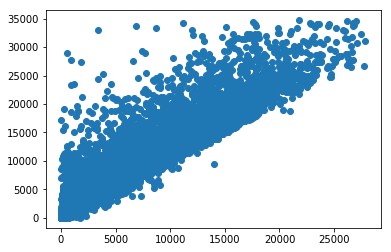

In [171]:
plt.scatter(X_train['rental30'],X_train['rental90'])

In [172]:
X_train[['rental30','rental90']].corr()

,rental30,rental90
rental30,1.000000,0.954208
rental90,0.954208,1.000000


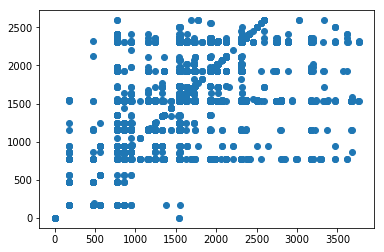

In [173]:
plt.scatter(X_train['medianamnt_ma_rech90'],X_train['medianamnt_ma_rech30'])

In [174]:
X_train[['medianamnt_ma_rech90','medianamnt_ma_rech30']].corr()

,medianamnt_ma_rech90,medianamnt_ma_rech30
medianamnt_ma_rech90,1.000000,0.946403
medianamnt_ma_rech30,0.946403,1.000000


C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


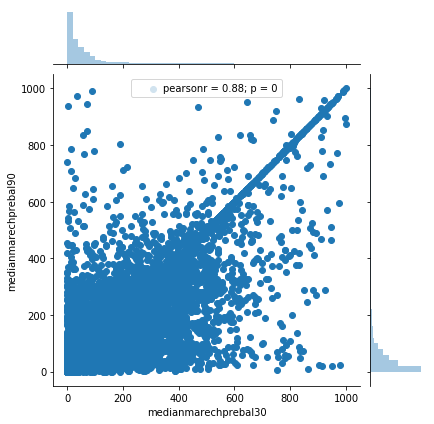

In [175]:
sns.jointplot(X_train['medianmarechprebal30'],X_train['medianmarechprebal90'])

In [176]:
X_train[['medianmarechprebal30','medianmarechprebal90']].corr()

,medianmarechprebal30,medianmarechprebal90
medianmarechprebal30,1.00000,0.88105
medianmarechprebal90,0.88105,1.00000


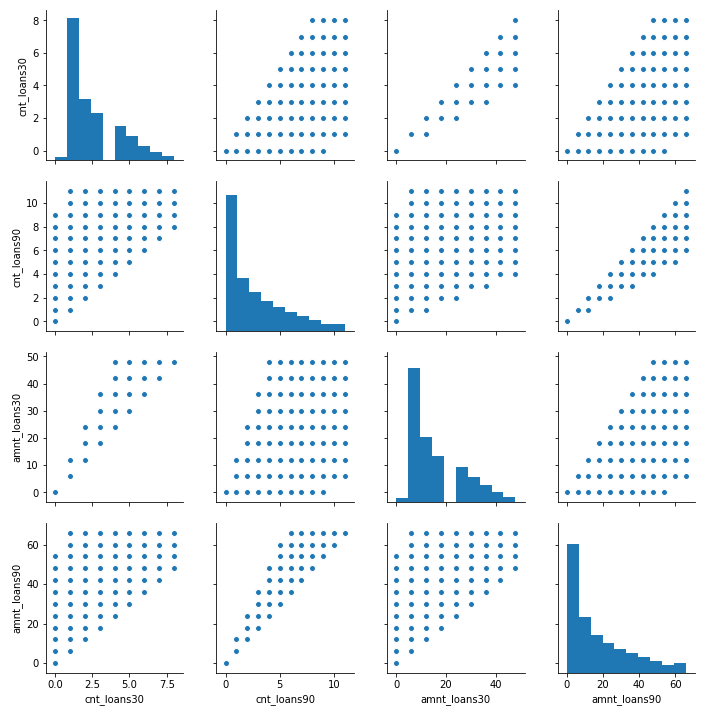

In [177]:
sns.pairplot(X_train[['cnt_loans30','cnt_loans90','amnt_loans30','amnt_loans90']])

In [178]:
X_train[['cnt_loans30','cnt_loans90','amnt_loans30','amnt_loans90']].corr()

,cnt_loans30,cnt_loans90,amnt_loans30,amnt_loans90
cnt_loans30,1.000000,0.870707,0.977095,0.853839
cnt_loans90,0.870707,1.000000,0.862214,0.987500
amnt_loans30,0.977095,0.862214,1.000000,0.878710
amnt_loans90,0.853839,0.987500,0.878710,1.000000


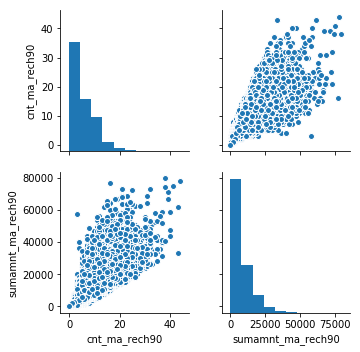

In [179]:
sns.pairplot(X_train[['cnt_ma_rech90','sumamnt_ma_rech90']])

In [180]:
X_train[['cnt_ma_rech90','sumamnt_ma_rech90']].corr()

,cnt_ma_rech90,sumamnt_ma_rech90
cnt_ma_rech90,1.000000,0.857464
sumamnt_ma_rech90,0.857464,1.000000


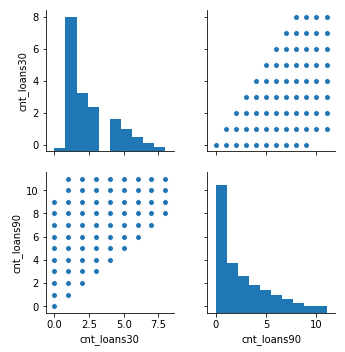

In [181]:
sns.pairplot(X_train[['cnt_loans30','cnt_loans90']])

In [182]:
X_train[['cnt_loans30','cnt_loans90']].corr()

,cnt_loans30,cnt_loans90
cnt_loans30,1.000000,0.870707
cnt_loans90,0.870707,1.000000


These columns pairs are highly correlated: 
1. daily_decr30,daily_decr90 taking daily_decr90
2. rental30,rental90 taking rental30
3. medianamnt_ma_rech90,medianamnt_ma_rech30 taking medianamnt_ma_rech90
4. medianmarechprebal30,medianmarechprebal90 taking medianmarechprebal90
5. cnt_loans90, amnt_loans90 taking cnt_loans90
6. cnt_loans30, amnt_loans30 taking cnt_loans30
7. cnt_ma_rech90, sumamnt_ma_rech90 taking sumamnt_ma_rech90
8. cnt_loans30,cnt_loans90 taking cnt_loans30

Dropping remaing features

In [183]:
X_train = X_train.drop(['daily_decr30','rental90','medianamnt_ma_rech30','medianmarechprebal30','amnt_loans90','amnt_loans30',
                        'cnt_ma_rech90','cnt_loans90','msisdn'],axis=1)
X_test = X_test.drop(['daily_decr30','rental90','medianamnt_ma_rech30','medianmarechprebal30','amnt_loans90','amnt_loans30',
                      'cnt_ma_rech90','cnt_loans90','msisdn'],axis=1)

## Find relationship between categorical features

In [184]:
# There are strong correlation between them
matthews_corrcoef(X_train['maxamnt_loans30'],X_train['maxamnt_loans90'])

0.9708697074649323

In [185]:
X_train = X_train.drop('maxamnt_loans90',axis=1)
X_test = X_test.drop('maxamnt_loans90',axis=1)

In [186]:
X_test = X_test.reset_index()

In [187]:
X_test = X_test.drop(['Unnamed: 0'],axis=1)

In [188]:
y_train = X_train['label']
y_test = X_test['label']

In [189]:
X_train = X_train.drop('label',axis=1)
X_test = X_test.drop('label',axis=1)

In [190]:
X_train = X_train.values
X_test = X_test.values

In [191]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

## Modelling

In [192]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.svm import SVC
from scipy import interp
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from statistics import mean
import warnings; warnings.simplefilter('ignore')

## Evaluaiton Metrics

In [193]:
def PlotConfusionMatrix(y_test,y_pred):
    cfn_matrix = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(5,5))
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',fmt='1',linewidths=0.5,annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    print('---Classification Report---')
    print(classification_report(y_test,y_pred))
    print("ROC-AUC Score")
    print(roc_auc_score(y_test,y_pred))

In [194]:
#In that we have to calculate the deliquency(the person that are failed to pay back in time),
#so for that below Evaluation metrics is used
def findFalsePositves(y_true,y_pred):
    tp, fn, fp, tn = confusion_matrix(y_true,y_pred).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return precision,recall

In [195]:
def falseRate(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    fall_out_rate = fp/(tn+fp) # Minimum is better
    false_discovery_rate = fp/(tp+fp) # Minimum is better
    return fall_out_rate,false_discovery_rate

## CrossValidation Method

In [196]:
def cross_validation(X_train,y_train,classifier):
    fall_out_rate_avg =[]
    false_discovery_rate_avg =[]
    for train, test in cv.split(X_train, y_train):
        pred = classifier.fit(X_train[train], y_train[train]).predict(X_train[test])
        # Compute confusion matrix
        #PlotConfusionMatrix(y_train[test], pred)
        #precision,recall = findFalsePositves(y_train[test],pred)
        fall_out_rate,false_discovery_rate = falseRate(y_train[test],pred)
        fall_out_rate_avg.append(fall_out_rate)
        false_discovery_rate_avg.append(false_discovery_rate)
    print("Avg. Fall Out Rate",mean(fall_out_rate_avg))
    print("Avg. False Discovery Rate",mean(false_discovery_rate_avg))

## Models

In [197]:
cv = StratifiedKFold(n_splits=10)
#classifier_one = GaussianNB()
classifier_two = lgb.LGBMClassifier(objective='binary')
classifier_three = GradientBoostingClassifier()
classifier_four = AdaBoostClassifier()
classifier_five = RandomForestClassifier()
classifier_six = XGBClassifier()

In [198]:
#print("GaussianNB Performace:")
#cross_validation(X_train,y_train,classifier_one)

In [199]:
print("LGBMClassifier Performace:")
cross_validation(X_train,y_train,classifier_two)

LGBMClassifier Performace:
Avg. Fall Out Rate 0.18311266732319365
Avg. False Discovery Rate 0.021409190537215173


In [200]:
print("GradientBoostingClassifier Performace:")
cross_validation(X_train,y_train,classifier_three)

GradientBoostingClassifier Performace:
Avg. Fall Out Rate 0.24206453416979734
Avg. False Discovery Rate 0.028015669987847058


In [201]:
print("AdaBoostClassifier Performace:")
cross_validation(X_train,y_train,classifier_four)

AdaBoostClassifier Performace:
Avg. Fall Out Rate 0.3173874279137437
Avg. False Discovery Rate 0.036454933393324264


In [202]:
print("RandomForestClassifier Performace:")
cross_validation(X_train,y_train,classifier_five)

RandomForestClassifier Performace:
Avg. Fall Out Rate 0.1982087350508403
Avg. False Discovery Rate 0.023219102575281706


In [ ]:
print("XGBClassifier Performace:")
cross_validation(X_train,y_train,classifier_six)

XGBClassifier Performace:


In [ ]:
## Avg. Fall Out Rate and Avg. False Discovery minimum in LGBMClassifier

In [ ]:
## Hypertuned Classifier
classifier_two = lgb.LGBMClassifier(objective='binary')

In [ ]:
print("LGBMClassifier Performace:")
cross_validation(X_train,y_train,classifier_two)
classifier_two.fit(X_train,y_train)
y_pred = classifier_two.predict(X_test)
fall_out_rate,false_discovery_rate = falseRate(y_test,y_pred)
print("Fall Out Rate",fall_out_rate)
print("False Discovery Rate",false_discovery_rate)
PlotConfusionMatrix(y_test,y_pred)